# MDI220 - Project
## SOUZA PINTO MEDEIROS, Gabriel

In [1]:
import math                           
import numpy as np                    
from sklearn import linear_model      
from os import mkdir                  
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import scipy.stats as stats

## Exercise 1

To clarify, I was having trouble downloading the dataset from the url because it locked behind the eCampus login, so I downloaded the file and placed it in the same directory as this notebook. In order to run this file please have the dataset in the same directory as the file being run

### 1.1

In [2]:
na_values= [''] #define values to be filled by NaN
fields = ['Date', 'Cost (millions 2013US$)'] #Columns observed
filename = 'C_id_35_NuclearPowerAccidents2016.csv' #If the dataset is not in the same directory as this notebook
#please change the filepath to the correct relative filepath
df = pd.read_csv(filename, sep=',', nrows=20000000, na_values=na_values, usecols=fields) #import the dataframe

In [3]:
df.loc[:,'Date']=pd.to_datetime(df['Date']).values #convert the dates to datetime
df = df.loc[df['Date']<np.datetime64('1979-03-28').astype('datetime64[ns]')] #drop unnecessary dates
df = df.dropna(how='any') #drop empty values
x = np.array(df['Cost (millions 2013US$)'].values) #make numpy array
print(f'I obtained a length of {len(x)} for x') #

I obtained a length of 55 for x


### 1.2

a)
Considering a gaussian distribution with mean μ and variance σ^2, where θ = (μ, σ)

The generic quantile function of the gaussian distribution is:
\begin{equation}
F_θ^{-1} = μ + σ\sqrt{2}erf^{-1}(2p-1), p \in (0,1)
\end{equation}
Where erf is the inverse error function

Considering θ = (0, 1)
\begin{equation}
F_{(0,1)}^{-1} = \sqrt{2}erf^{-1}(2p-1)
\end{equation}

Μultiplying by an arbitrary σ:
\begin{equation}
σF_{(0,1)}^{-1} = σ\sqrt{2}erf^{-1}(2p-1)
\end{equation}

Adding an arbitrary μ:
\begin{equation}
μ + σF_{(0,1)}^{-1} = μ + σ\sqrt{2}erf^{-1}(2p-1)
\end{equation}

Substituting the generic quantile function we obtain:
\begin{equation}
μ + σF_{(0,1)}^{-1} = F_{(μ, θ)}^{-1}
\end{equation}

b)

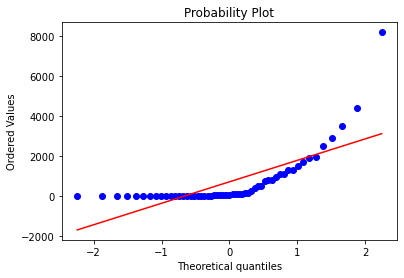

In [218]:
stats.probplot(x, dist = 'norm', plot = plt)
plt.show()

### 1.3

a) In order to find the quantile function we must start from the CDF:
\begin{equation}
F(x, θ) = 1 - e^{-θx}
\end{equation}

Assuming a probability p and isolating x we obtain the quantile function:
\begin{equation}
F_θ^{-1}(p)= -\frac{ln(1-p)}{θ}
\end{equation}

Assuming θ = 1:
\begin{equation}
F_1^{-1}(p)= -{ln(1-p)}
\end{equation}

Dividing by a generic θ:
\begin{equation}
\frac{F_1^{-1}(p)}{θ}= \frac{-{ln(1-p)}}{θ}
\end{equation}

Finally, substituting the original quantile function:
\begin{equation}
\frac{F_1^{-1}(p)}{θ}= F_θ^{-1}(p)
\end{equation}

b)

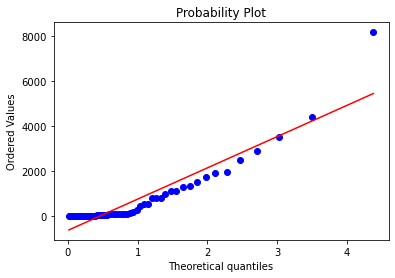

In [219]:
stats.probplot(x, dist = 'expon', plot = plt)
plt.show()

### 1.4

Upon analyzing the plot generated at 1.2, clearly we don't have a Normal distribution. At 1.3, however, it seems like the Q-Q plot is closer to a straight line, albeit with some outliers. We can therefore extrapolate that the data behaves like an exponential distribution, which coincides with the proposed analysis for upcoming questions.

## Exercise 2

### 2.1
Firstly we start from the likelihood function of the exponential:
\begin{equation}
L(θ|x_1, x_2, ... x_n) = \prod_{i=1}^{n}θe^{-xθ} = θ^ne^{-θ\sum_{i=1}^{n}x}
\end{equation}

In order to make this function easier to maximize, we apply the log to obtain the log-likelihood function:
\begin{equation}
nln(θ) -θ\sum_{i=1}^{n}x
\end{equation}

Now, in order to maximize we take the derivative and equate to 0:
\begin{equation}
0 = \frac{n}{θ} -\sum_{i=1}^{n}x
\end{equation}

Thus, the maximum likelihood estimator of θ is:
\begin{equation}
\widehat θ = \frac{n}{\sum_{i=1}^{n}x}
\end{equation}

In [220]:
ML = len(x)/x.sum()
print(f'The maximum likelihood estimator for θ is: {ML:.4f}')

The maximum likelihood estimator for θ is: 0.0014


### 2.2

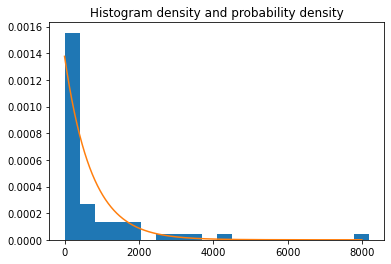

In [221]:
plt.hist(x,20, density = True)
ln = np.linspace(0, 8000, 8001)
plt.plot(ln, ML*np.exp(-ML*ln))
plt.title("Histogram density and probability density")
plt.show()

### 2.3

Starting from the previously obtained log likelihood function:
\begin{equation}
nln(θ) -θ\sum_{i=1}^{n}x
\end{equation}

Log likelihood for n = 1:
\begin{equation}
logp_θ(x) = ln(θ)- xθ
\end{equation}

Finding the fisher information:
\begin{equation}
I(θ) = -E(\frac{\partial^2 logp_θ(x)}{\partial θ^2})n = \frac{n}{θ^2}
\end{equation}

Finding $g'(θ)$:
\begin{equation}
g'(θ) = (\frac{1}{θ})' = -\frac{1}{θ^2}
\end{equation}

Applying the Cramer-Rao bound:
\begin{equation}
Var(\widehat g) \geq \frac{g'(θ)^2}{I(θ)}
\end{equation}

\begin{equation}
\frac{1}{nθ^2} \geq \frac{\frac{1}{θ^4}}{\frac{n}{θ^2}} = \frac{1}{nθ^2}
\end{equation}

Thus the estimator is efficient

### 2.4

In [222]:
g = 1/ML
print(f'The mean is {x.sum()/len(x):.2f}')
print(f'The efficient estimator for the mean is {g:.2f}')

The mean is 726.34
The efficient estimator for the mean is 726.34


### 2.5
First we calculate E(X) and E(X^2):
\begin{equation}
E(X) = 1/θ
\end{equation}
\begin{equation}
E(X^2) = 2/θ^{2}
\end{equation}

Now we calculate the expected values for the previous estimator:
\begin{equation}
E(\widehat g) = E(\frac{X_1 + X_2 + ... + X_n}{n}) = 
\end{equation}

\begin{equation}
\frac{E(X_1) + E(X_2) + ... + E(X_n)}{n} = 
\end{equation}

\begin{equation}
\frac{\frac{1}{θ} + \frac{1}{θ} + ... + \frac{1}{θ}}{n} = 
\end{equation}

\begin{equation}
\frac{\frac{n}{θ}}{n} = 
\end{equation}

\begin{equation}
E(\widehat g) = \frac{1}{θ}
\end{equation}

For the new estimator:
\begin{equation}
E(η\frac{X_1 + X_2 + ... + X_n}{n}) = 
\end{equation}

\begin{equation}
\frac{ηE(X_1) + ηE(X_2) + ... + ηE(X_n)}{n} = 
\end{equation}

\begin{equation}
\frac{\frac{η}{θ} + \frac{η}{θ} + ... + \frac{η}{θ}}{n} = 
\end{equation}

\begin{equation}
\frac{\frac{nη}{θ}}{n} = 
\end{equation}

\begin{equation}
E(\widehat g_η) = \frac{η}{θ}
\end{equation}

Now to find the variance for the old estimator:
\begin{equation}
Var(\widehat g) = Var(\frac{X_1 + X_2 + ... + X_n}{n}) = 
\end{equation}

\begin{equation}
\frac{Var(X_1 + X_2 + ... + X_n)}{n^2} = 
\end{equation}

\begin{equation}
\frac{nVar(X)}{n^2} = 
\end{equation}

\begin{equation}
\frac{E(X^2) - E(X)^2}{n} = 
\end{equation}

\begin{equation}
\frac{\frac{2}{θ^2} - \frac{1}{θ^2}}{n} = 
\end{equation}

\begin{equation}
Var(\widehat g) = \frac{1}{nθ^2}
\end{equation}

Now to find the variance for the new one:
\begin{equation}
Var(\widehat g_η) = Var(\frac{η(X_1 + X_2 + ... + X_n)}{n}) = 
\end{equation}

\begin{equation}
\frac{η^2Var(X_1 + X_2 + ... + X_n)}{n^2} = 
\end{equation}

\begin{equation}
\frac{η^2nVar(X)}{n^2} = 
\end{equation}

\begin{equation}
\frac{η^2E(X^2) - η^2E(X)^2}{n} = 
\end{equation}

\begin{equation}
\frac{\frac{2η^2}{θ^2} - \frac{η^2}{θ^2}}{n} = 
\end{equation}

\begin{equation}
Var(\widehat g_η) = \frac{η^2}{nθ^2}
\end{equation}

Finally, to find the bias for the previous estimator:
\begin{equation}
B(\widehat g, g) = E(\widehat g) - g = \frac{1}{θ} - \frac{1}{θ}= 0
\end{equation}

For the new one however:
\begin{equation}
B(\widehat g_η, g) = E(\widehat g_η) - g = \frac{η}{θ} - \frac{1}{θ} = \frac{η-1}{θ} 
\end{equation}

Finding the risk function for the previous estimator:
\begin{equation}
R(θ, \widehat g) = Var(\widehat g) = \frac{1}{nθ^2}
\end{equation}

Doing the same for the new estimator:
\begin{equation}
R(θ, \widehat g_η) = Var(\widehat g_η) + B(\widehat g_η, g)^2 = \frac{η^2}{nθ^2} + \frac{η^2-2η+1}{θ^2}
\end{equation}

Substituting in the inequality:
\begin{equation}
\frac{η^2}{nθ^2} + \frac{η^2-2η+1}{θ^2} - \frac{1}{nθ^2} < 0
\end{equation}

\begin{equation}
η^2 + n(η^2-2η+1) - 1 < 0
\end{equation}

\begin{equation}
η^2(1+n) + η(-2n) + (-1 + n) < 0
\end{equation}

\begin{equation}
\frac{2n \pm \sqrt{4n^2 - 4(n^2 - 1)}}{2(1+n)}
\end{equation}

\begin{equation}
\frac{n \pm 1}{1+n}
\end{equation}

Thus, the interval for which $R(θ,\widehat g) > R(θ, \widehat g_η)$ is $η = (\frac{n-1}{n+1}, 1)$

### 2.6
To get the median we must take the CDF and equate it to 0.5:
\begin{equation}
0.5 = 1-e^{\frac{-x}{\widehat g}}
\end{equation}

Resulting in:
\begin{equation}
x = ln(2)\widehat g
\end{equation}

Thus:
\begin{equation}
η = ln(2)
\end{equation}

In [223]:
print(f'The estimated median is {1/ML*np.log(2):.2f}')

The estimated median is 503.46


In [224]:
print(f'The median obtained is {np.median(x)}')

The median obtained is 89.9


This happens because there are an abnormal amount of samples equal to zero, producing a rather skewed sample dataset when compared to an ideal exponential distribution. This can be observed in the Q-Q plot in question 1.3 b) 
### 2.7

In [225]:
η = np.log(2)
θ = ML
n = 55
Rgη = η**2/(n*θ**2) + (η**2-2*η+1)/(θ**2)
Rg = 1/(n*θ**2)

print(f'The risk for the Rgη estimator is {Rgη:.2f}')
print(f'The risk for the Rg estimator is {Rg:.2f}')

The risk for the Rgη estimator is 54283.31
The risk for the Rg estimator is 9592.08


## Exercise 3
### 3.1
$H_0 = \{θ_0| θ_0 \in Θ, \frac{1}{θ_0} \geq 1000\}$ and $ H_1 = \{θ_1| θ_1 \in Θ, \frac{1}{θ_1} \lt 1000\}$ 

### 3.2
Considering $S = \sum_{i=1}^{n}x_i$
\begin{equation}
L(x) = \frac{p_1(x)}{p_0(x)} = \frac{θ_1e^{-xθ_1}}{θ_0e^{-xθ_0}} = \frac{θ_1}{θ_0}e^{S(θ_0 - θ_1)}
\end{equation}
Thus, the most powerful test at a given α will be:
\begin{equation}
    \begin{cases}
    H_1, & \text{if $L(x)>γ$}.\\
    H_0, & \text{if $L(x)<γ$}.
    \end{cases}
\end{equation}
For a constant $γ > 0$

Isolating x in L(x), we obtain:
\begin{equation}
    \begin{cases}
    H_1, & \text{if $S \leq \frac{ln(γΘ_0/θ_1)}{θ_0-θ_1} = c$}.\\
    H_0, & \text{if $S \gt \frac{ln(γΘ_0/θ_1)}{θ_0-θ_1} = c$}.
    \end{cases}
\end{equation}
Where $S \sim Γ(k, θ)$ with $k = n$ and $θ = θ$. 

### 3.3
In order to obtain the p-value, one must simulate a gamma function. So the percentile of the sum of the cost vector in a Gamma function with $a = 55$ and $θ = 1000$ is:

In [226]:
k = 55
print(f'The p value is {stats.gamma.cdf(x.sum(), 55, scale = 1000)*100:.2f}%')

The p value is 1.37%


Since it is smaller than the significance level of 5%, we accept hypothesis 1 and conclude it is indeed inferior to 1000 dollars

### 3.4

In [228]:
avg = []
for n in range(300):
    avg.append(np.random.exponential(1000, 55).sum())

In [229]:
def rejecReg(n, scale):
    return stats.gamma.ppf(0.05, n, scale = scale)/n

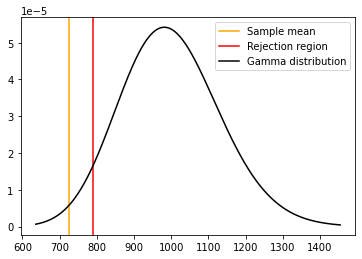

The threshold for rejection is 789.01


In [231]:
aux = np.linspace(int(35000/55), int(80000/55), 1000)
plt.axvline(np.mean(x), color='orange', label = 'Sample mean')
plt.axvline(rejecReg(55, 1000), color='Red', label = 'Rejection region')
plt.plot(aux, stats.gamma.pdf(np.linspace(35000, 80000, 1000), 55, scale = 1000), color = 'black', label = 'Gamma distribution')
plt.legend()
plt.show()
print(f'The threshold for rejection is {rejecReg(55, 1000):.2f}')

### 3.5
In order to calculate the power one must be able to calculate the type-II errors. So starting arbitrarily from $\frac{1}{θ} = 500$ I will calculate the probability it is above the rejection threshold above. 

In [210]:
def powerplot(n_samples):
    x = range(500, 1000, 10)
    y=[]
    for i in x:
        y.append(stats.gamma.cdf(rejecReg(n_samples, 1000)*n_samples, n_samples, scale = i))
    return y

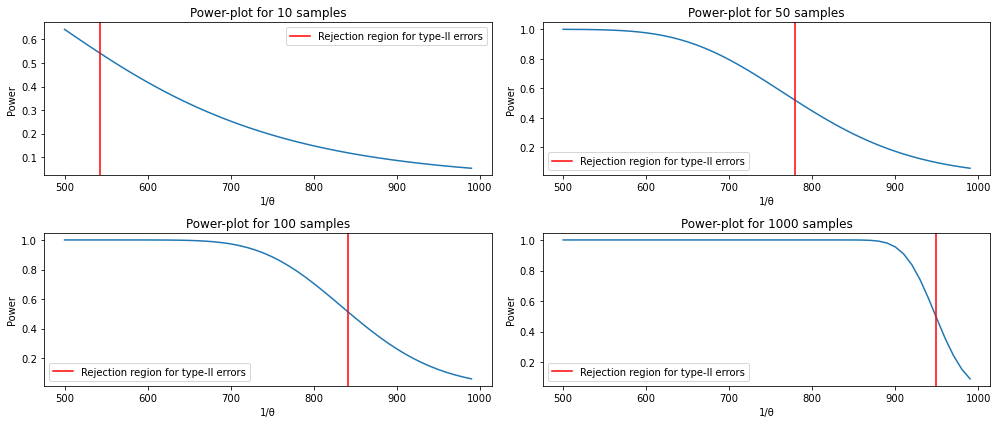

In [211]:
x = range(500, 1000, 10)

plt.subplots(2, 2, figsize = (14, 6))

plt.subplot(221)
plt.plot(x, powerplot(10))
plt.axvline(rejecReg(10, 1000), color='Red', label = 'Rejection region for type-II errors')
plt.xlabel("1/θ")
plt.ylabel("Power")
plt.title("Power-plot for 10 samples")
plt.legend()

plt.subplot(222)
plt.plot(x, powerplot(50))
plt.axvline(rejecReg(50, 1000), color='Red', label = 'Rejection region for type-II errors')
plt.xlabel("1/θ")
plt.ylabel("Power")
plt.title("Power-plot for 50 samples")
plt.legend()

plt.subplot(223)
plt.plot(x, powerplot(100))
plt.axvline(rejecReg(100, 1000), color='Red', label = 'Rejection region for type-II errors')
plt.xlabel("1/θ")
plt.ylabel("Power")
plt.title("Power-plot for 100 samples")
plt.legend()

plt.subplot(224)
plt.plot(x, powerplot(1000))
plt.axvline(rejecReg(1000, 1000), color='Red', label = 'Rejection region for type-II errors')
plt.xlabel("1/θ")
plt.ylabel("Power")
plt.title("Power-plot for 1000 samples")
plt.legend()

plt.tight_layout()
plt.show()

To maximize power one must minimize type-II errors. Type-II errors are caused by values that exceed the threshold for rejection. If we take the curve that represents hypothesis 1, and iterate its center while applying the decision rule above considering H0 centered in 1000, it is possible to graph the power. The more samples collected from the exponential distribution, the higher observed power. Thus, the powerplot for 1000 samples mantains itself at power = 1 the longest until it suddenly decreases. 

### 3.6
Because of the central limit theorem, it is possible to approximate the behavior of the distribution to a normal. Thus: $Γ(n, θ) \sim N(\frac{1}{θ}, \frac{1}{θ^2n})$ as calculated in 2.5. 

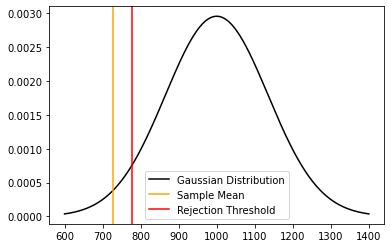

In [236]:
mean = 1000
variance = (1000**2)/55

xg = np.linspace(600, 1400, 1000)
gaus=stats.norm(loc=mean, scale = np.sqrt(variance))

plt.plot(xg, gaus.pdf(xg), color = 'black', label = "Gaussian Distribution")
plt.axvline(g, color='orange', label = 'Sample Mean')
plt.axvline(gaus.ppf(0.05), color='red', label = 'Rejection Threshold')
plt.legend()
plt.show()

In [237]:
print(f'The threshold for rejection when using the Central limit theorem is: {gaus.ppf(0.05):.2f}')

The threshold for rejection when using the Central limit theorem is: 778.21


This threshold is lower then when using the gamma distribution. However, it is still higher than the mean obtained in the sampled data, so the null hypothesis is still rejected in favor of hypothesis 1. 